In [1]:
#import modules
import pandas as pd
import geopandas as gpd
import contextily as cx
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon

#render plots within the notebook
%matplotlib inline

In [2]:
#read data
toronto_roads = gpd.read_file('/workspace/GIS_project/downloads/toronto/shape/roads.shp')
red_light_cameras = gpd.read_file('/workspace/GIS_project/downloads/redlights/Red Light Cameras Data - 4326.shp')
traffic_calming = gpd.read_file('/workspace/GIS_project/downloads/traffic_calming/Traffic Calming Database - 04.04.2023V2.shp')

#read csv and convert to a geodataframe
traffic_intersections = pd.read_csv('/workspace/GIS_project/downloads/traffic/count_metadata.csv')
points = traffic_intersections.apply(lambda row: Point(row.lng, row.lat), axis = 1)
traffic_intersections = gpd.GeoDataFrame(traffic_intersections, geometry=points)
#using metadate (filename) to initialize the data with the proper projection
traffic_intersections.crs = {'init': 'epsg:4326'}


/workspace/GIS_project/venv/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


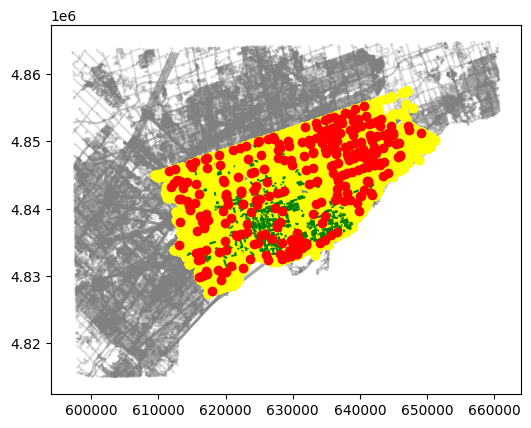

In [10]:
#display data to see if it loaded correctly
#first make sure all layers have the same crs
#Using N17 Zone projection
projection=26917
toronto_roads = toronto_roads.to_crs(epsg=projection)
red_light_cameras = red_light_cameras.to_crs(epsg=projection)
traffic_calming = traffic_calming.to_crs(epsg=projection)
traffic_intersections = traffic_intersections.to_crs(epsg=projection)

#multiple layers on one plot
fig, ax = plt.subplots()
toronto_roads.plot(ax=ax, color='grey', alpha=0.25, zorder=1)
red_light_cameras.plot(ax=ax, color='red',zorder=4)
traffic_calming.plot(ax=ax, color='green',zorder=3)
traffic_intersections.plot(ax=ax, color='yellow',zorder=2)

cx.add_basemap(ax, crs=toronto_roads.crs)